# Decision Tree on Iris Dataset

### Author :- Raj Roge

In [1]:
#importing necessary libraries
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import load_iris
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,confusion_matrix,plot_confusion_matrix 
import matplotlib.pyplot as plt

In [2]:
#load the dataset
iris =load_iris()
iris

{'data': array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
  

In [3]:
#converting the dataset into dataframe
iris_df = pd.DataFrame(iris.data) #adds independent features in dataframe
iris_df.columns = iris.feature_names #assigning column names
iris_df['Species'] = iris.target #dependent feature 
iris_df.head(5)
df = iris_df.copy()
#iris_df['Species'].value_counts()

In [4]:
iris.target_names #classes of dependent feature

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [5]:
#adding species name to dependent feature
iris_df.loc[iris_df['Species']==0,'Species']=iris.target_names[0]
iris_df.loc[iris_df['Species']==1,'Species']=iris.target_names[1]
iris_df.loc[iris_df['Species']==2,'Species']=iris.target_names[2]
iris_df.head()


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),Species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


**sepal length(cm), sepal width(cm), petal length(cm), petal width(cm) are independent features while Species is dependent on these features**

In [6]:
df.corr()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),Species
sepal length (cm),1.000000,-0.117570,0.871754,0.817941,0.782561
sepal width (cm),-0.117570,1.000000,-0.428440,-0.366126,-0.426658
petal length (cm),0.871754,-0.428440,1.000000,0.962865,0.949035
petal width (cm),0.817941,-0.366126,0.962865,1.000000,0.956547
Species,0.782561,-0.426658,0.949035,0.956547,1.000000


**Correlation is one way to find the strength between the relationship of features available**

In [7]:
df.head()
#For any model it is necessary to convert any feature having strings into int/float/etc values

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),Species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [8]:
x = df.iloc[:,:4].values
y = df.iloc[:,-1].values

In [9]:
# create train and test data
x_train,x_test,y_train,y_test = train_test_split(x,y,random_state=22)

In [10]:
#Calling the DecisionTreeClassifier
dtc = DecisionTreeClassifier(random_state=0)
dtc = dtc.fit(x_train,y_train)
y_pred = dtc.predict(x_test)

In [11]:
dtc.score(x_train,y_train) ,dtc.score(x_test,y_test)

(1.0, 0.8947368421052632)

In [12]:
accuracy_score(y_test,y_pred) #calculates the accuracy of the model

0.8947368421052632

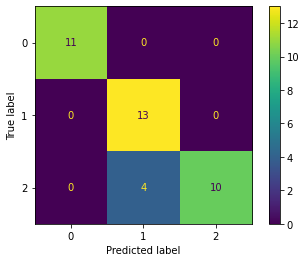

In [13]:
plot_confusion_matrix(dtc,x_test,y_test) #helps in finding the number of correct and incorrect estimates

**Here 34 out of 38 are correctly classified** 

### Visualising the Decision tree

[Text(453.375, 747.4499999999999, 'petal width (cm) <= 0.75\ngini = 0.666\nsamples = 112\nvalue = [39, 37, 36]\nclass = setosa'),
 Text(383.625, 611.55, 'gini = 0.0\nsamples = 39\nvalue = [39, 0, 0]\nclass = setosa'),
 Text(523.125, 611.55, 'petal width (cm) <= 1.75\ngini = 0.5\nsamples = 73\nvalue = [0, 37, 36]\nclass = versicolor'),
 Text(348.75, 475.65, 'petal length (cm) <= 5.05\ngini = 0.142\nsamples = 39\nvalue = [0, 36, 3]\nclass = versicolor'),
 Text(209.25, 339.74999999999994, 'sepal length (cm) <= 4.95\ngini = 0.054\nsamples = 36\nvalue = [0, 35, 1]\nclass = versicolor'),
 Text(139.5, 203.8499999999999, 'petal width (cm) <= 1.35\ngini = 0.5\nsamples = 2\nvalue = [0, 1, 1]\nclass = versicolor'),
 Text(69.75, 67.94999999999993, 'gini = 0.0\nsamples = 1\nvalue = [0, 1, 0]\nclass = versicolor'),
 Text(209.25, 67.94999999999993, 'gini = 0.0\nsamples = 1\nvalue = [0, 0, 1]\nclass = virginica'),
 Text(279.0, 203.8499999999999, 'gini = 0.0\nsamples = 34\nvalue = [0, 34, 0]\nclass = v

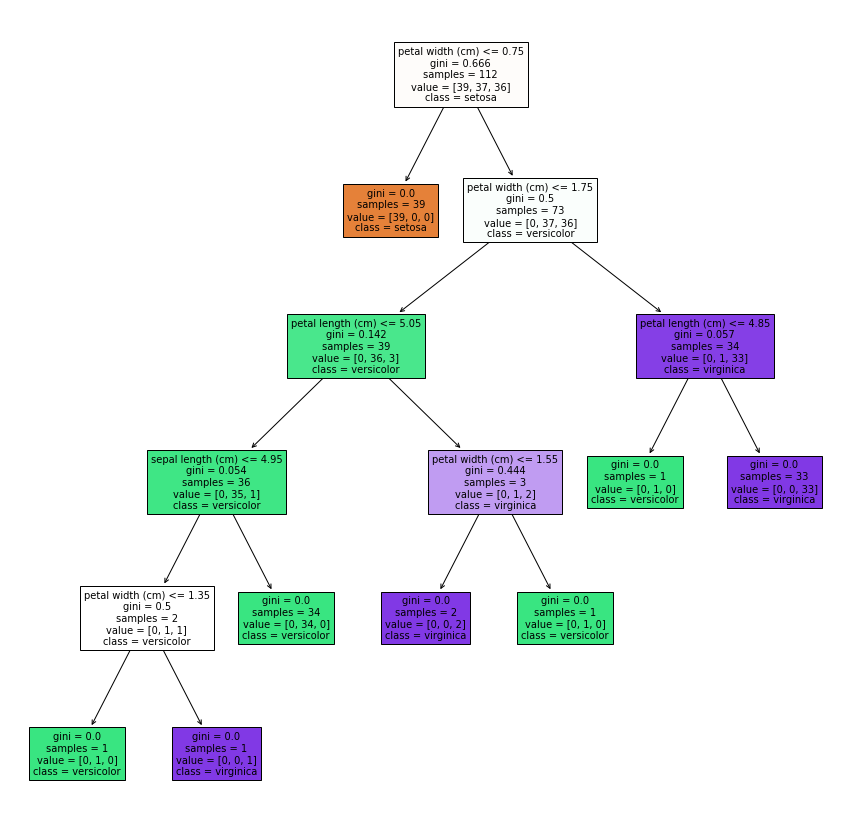

In [14]:
plt.figure(figsize=(15,15))
tree.plot_tree(dtc,filled=True,class_names=['setosa', 'versicolor', 'virginica'],feature_names=['sepal length (cm)',
  'sepal width (cm)','petal length (cm)','petal width (cm)'])
#we can easily plot the Decision Tree using the plot_tree method in tree 

### Many times a model with high train score and low test score can cause overfitting. To avoid overfitting we perform cost_complexity_pruning_path test to get maximum test as well as train score

In [15]:
cost_pruning = dtc.cost_complexity_pruning_path(x_train,y_train)
ccp_alpha = cost_pruning.ccp_alphas #proper ccp_alpha value can remove overfitting tendencies

In [16]:
ccp=[]
for i in ccp_alpha:
    ss=DecisionTreeClassifier(ccp_alpha=i,random_state=0)
    ss.fit(x_train,y_train)
    ccp.append(ss)
ccp    

[DecisionTreeClassifier(random_state=0),
 DecisionTreeClassifier(ccp_alpha=0.008680555555555558, random_state=0),
 DecisionTreeClassifier(ccp_alpha=0.011904761904761904, random_state=0),
 DecisionTreeClassifier(ccp_alpha=0.01733193277310924, random_state=0),
 DecisionTreeClassifier(ccp_alpha=0.020184676434676415, random_state=0),
 DecisionTreeClassifier(ccp_alpha=0.25904922032037264, random_state=0),
 DecisionTreeClassifier(ccp_alpha=0.3404629403131116, random_state=0)]

In [17]:
train_scores = [i.score(x_train, y_train) for i in ccp]
test_scores = [i.score(x_test, y_test) for i in ccp]

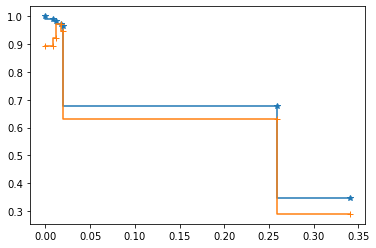

In [18]:
plt.plot(ccp_alpha,train_scores,marker='*',drawstyle='steps',label='train score')
plt.plot(ccp_alpha,test_scores,marker='+',drawstyle='steps',label='test score')

In [19]:
df = pd.DataFrame({'test_scores':test_scores,'train_scores':train_scores,'ccp_alpha':ccp_alpha})
df #for ccp_alpha=0.0173 the train and test score are very high

,test_scores,train_scores,ccp_alpha
0,0.894737,1.000000,0.000000
1,0.894737,0.991071,0.008681
2,0.921053,0.982143,0.011905
3,0.973684,0.973214,0.017332
4,0.947368,0.964286,0.020185
5,0.631579,0.678571,0.259049
6,0.289474,0.348214,0.340463


**for ccp_alpha=0.0173 the train and test score are very high**

[Text(223.2, 475.65000000000003, 'petal width (cm) <= 0.75\ngini = 0.666\nsamples = 112\nvalue = [39, 37, 36]\nclass = setosa'),
 Text(111.6, 339.75, 'gini = 0.0\nsamples = 39\nvalue = [39, 0, 0]\nclass = setosa'),
 Text(334.79999999999995, 339.75, 'petal width (cm) <= 1.75\ngini = 0.5\nsamples = 73\nvalue = [0, 37, 36]\nclass = versicolor'),
 Text(223.2, 203.85000000000002, 'petal length (cm) <= 5.05\ngini = 0.142\nsamples = 39\nvalue = [0, 36, 3]\nclass = versicolor'),
 Text(111.6, 67.94999999999999, 'gini = 0.054\nsamples = 36\nvalue = [0, 35, 1]\nclass = versicolor'),
 Text(334.79999999999995, 67.94999999999999, 'gini = 0.444\nsamples = 3\nvalue = [0, 1, 2]\nclass = virginica'),
 Text(446.4, 203.85000000000002, 'gini = 0.057\nsamples = 34\nvalue = [0, 1, 33]\nclass = virginica')]

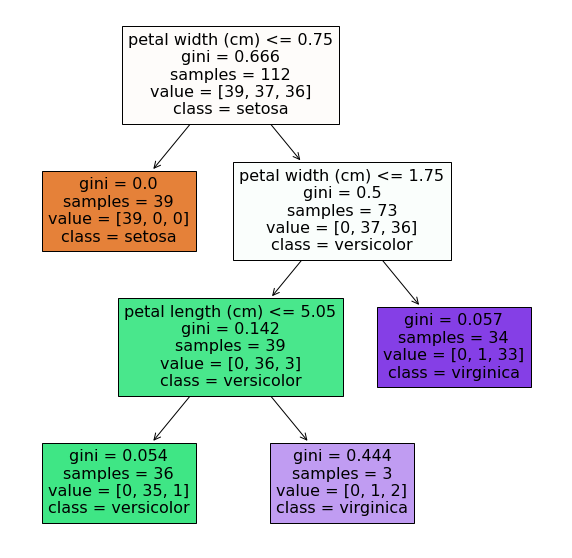

In [20]:
dtc = DecisionTreeClassifier(random_state=0,ccp_alpha=0.017332)
dtc = dtc.fit(x_train,y_train)
plt.figure(figsize=(10,10))
tree.plot_tree(dtc,filled=True,class_names=['setosa', 'versicolor', 'virginica'],feature_names=['sepal length (cm)',
  'sepal width (cm)','petal length (cm)','petal width (cm)'])